In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# reading the data
df = pd.read_csv('lab/NAS.csv')

In [9]:
# Removing null-values
df.dropna(inplace=True)

In [10]:
#Makes Date a datetime object
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

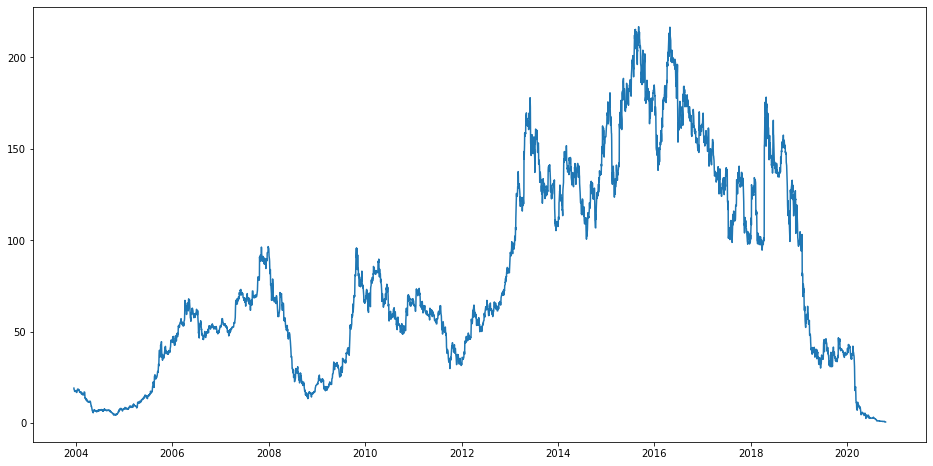

In [11]:
#Plotting graph based on close-price
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'], label='Close Price history')

In [12]:
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [13]:
df

,Date,Close
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
7,2003-12-29,17.254400
...,...,...
4248,2020-10-12,0.676800
4249,2020-10-13,0.600600
4250,2020-10-14,0.626000
4251,2020-10-15,0.605000


In [14]:
X= df.iloc[:, :-1].values
y= df.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, criterion='mse', random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [17]:
y_pred=model.predict(X_test)

In [18]:
from sklearn import metrics  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test))

MAE 1.5663990066350677
MSE 6.904808587919803
RMSE 2.627700246968783
Score: 0.9976783523182174


Score value might be too high, but not able to find out why.

In [19]:
# making X_test into 1d array to use in prediction dataframe
reshapeX = np.ravel(X_test)
reshapeX.shape

(1266,)

In [20]:
# creating prediction dataframe based on the y_test and y_pred values.
predictiondf=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Date':reshapeX})

In [21]:
# Sorting the list by Date
predictiondf.sort_values('Date', inplace=True)
predictiondf

,Actual,Predicted,Date
329,18.454201,18.662741,2003-12-19
893,17.254400,17.725754,2003-12-29
1083,17.711500,17.722329,2003-12-30
888,16.740200,17.265806,2004-01-08
889,18.397100,18.242249,2004-01-14
...,...,...,...
939,0.989000,0.984794,2020-10-05
934,0.922600,0.966450,2020-10-07
1125,0.917800,0.867362,2020-10-08
210,0.696400,0.840818,2020-10-09


In [22]:
# Making Date the index value
predictiondf.set_index('Date', inplace=True)

In [23]:
predictiondf

,Actual,Predicted
Date,,
2003-12-19,18.454201,18.662741
2003-12-29,17.254400,17.725754
2003-12-30,17.711500,17.722329
2004-01-08,16.740200,17.265806
2004-01-14,18.397100,18.242249
...,...,...
2020-10-05,0.989000,0.984794
2020-10-07,0.922600,0.966450
2020-10-08,0.917800,0.867362


In [24]:
# Finding predicted price based on a date
predictiondf.loc['2020-10-07']

Actual       0.92260
Predicted    0.96645
Name: 2020-10-07 00:00:00, dtype: float64

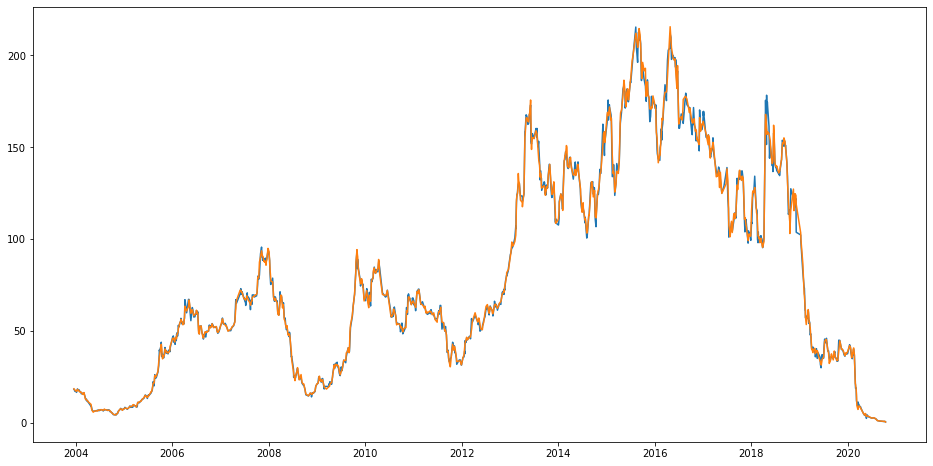

In [25]:
# Comparing the prices based on y_pred and y_test

plt.figure(figsize=(16,8))
plt.plot(predictiondf)

Text(0.5, 1.0, 'Actual vs Fitted Values for Price')

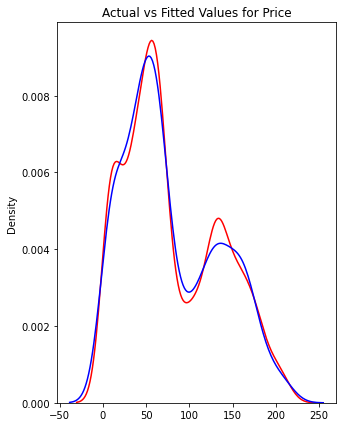

In [26]:
# Comparing price based on y and y_pred.

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')